# Ejercicios visualización II

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0) 
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,...,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,...,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,...,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,...,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,...,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,...,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


# ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [3]:
df_continentes = df.groupby("continent")["country"].count().reset_index()

In [4]:
# Añadir columna de porcentajes

df_continentes["porcentajes"]=round(df_continentes['country']/df.shape[0]*100,2)

In [5]:
df_continentes

,continent,country,porcentajes
0,Africa,53,27.18
1,Asia,45,23.08
2,Central America,20,10.26
3,Europe,47,24.10
4,North America,2,1.03
5,Oceania,14,7.18
6,South America,13,6.67


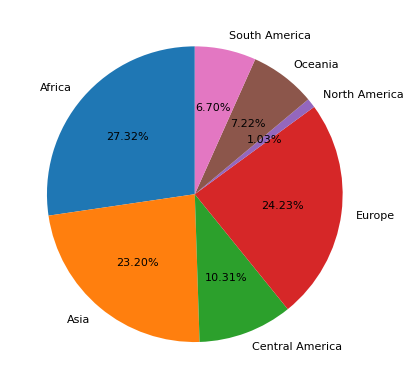

In [6]:
plt.pie('country', labels='continent', data= df_continentes, autopct = '%1.2f%%', startangle=90, textprops={'fontsize': 8});

2. ¿Cuáles son los 10 países con la mayor área forestal?



In [7]:
cosas = df.sort_values('forested_area', ascending=False)[['forested_area', 'country']].head(10)

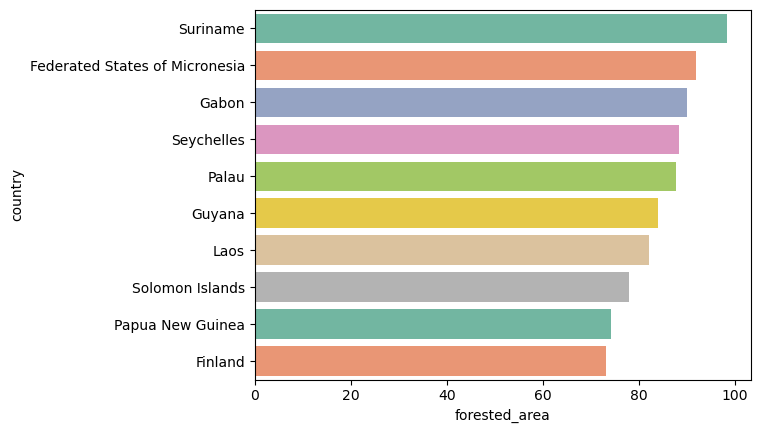

In [8]:
sns.barplot(y='country', x='forested_area', hue='country', data=cosas, palette='Set2');

3. ¿Cómo se distribuye la densidad de población entre los países?

In [9]:
df.shape

(195, 36)

<Axes: xlabel='density', ylabel='Count'>

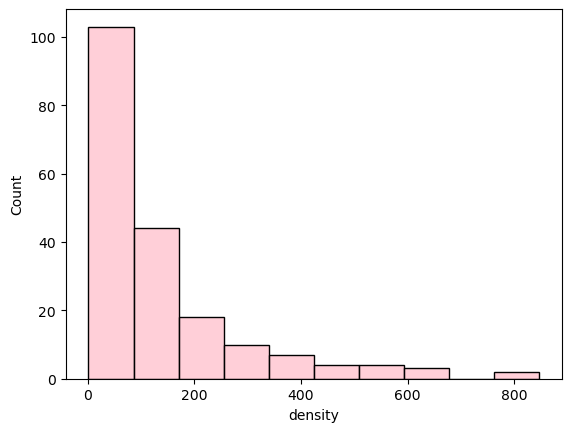

In [16]:
sns.histplot(data=df, x='density', bins=10, kde=False, color='pink')

In [11]:
df[['cpi', 'unemployment_rate']].head(3)

,cpi,unemployment_rate
0,149.90,11.12
1,119.05,12.33
2,151.36,11.70


4. ¿Existe una relación entre el PIB y la tasa de desempleo de los países?



<Axes: xlabel='cpi', ylabel='unemployment_rate'>

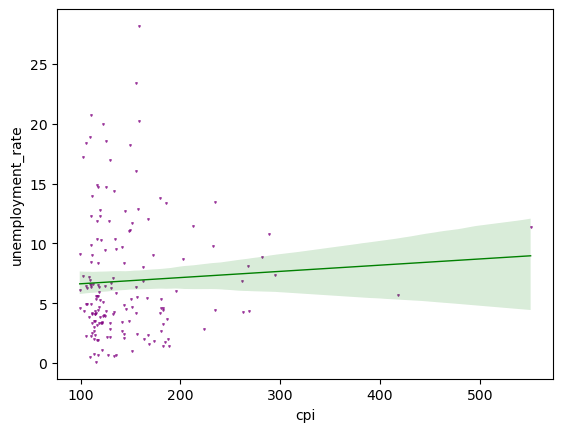

In [12]:
sns.regplot(x = 'cpi', y = 'unemployment_rate', data = df, marker= 'v', scatter_kws={'color': 'purple', 's': 1}, line_kws={'color': 'green', 'linewidth': 1})

In [13]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

5.¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

<Axes: xlabel='infant_mortality', ylabel='life_expectancy'>

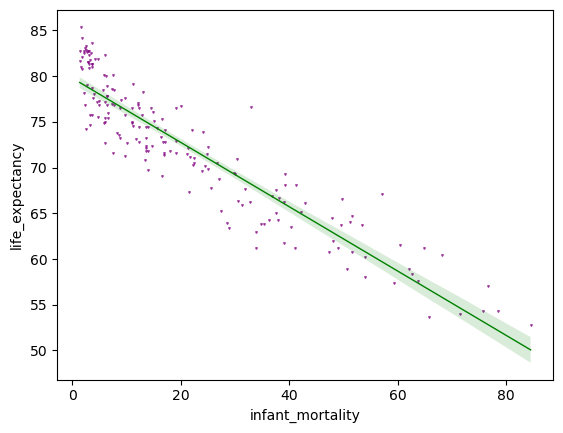

In [14]:
sns.regplot(x = 'infant_mortality', y = 'life_expectancy', data = df, marker= 'v', scatter_kws={'color': 'purple', 's': 1}, line_kws={'color': 'green', 'linewidth': 1})